In [1]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from tensorflow.keras.models import Model
import os
from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16,ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Input,GlobalAveragePooling2D,SeparableConv2D
from tensorflow.keras.models import load_model
from sklearn.model_selection import KFold
 
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import shutil
from sklearn.model_selection import train_test_split
 
# Define paths
base_dir = r'C:\Users\srida\Downloads\CNN Images dataset\Food'
train_dir = r'C:\Users\srida\Downloads\CNN Images dataset\Train'
test_dir = r'C:\Users\srida\Downloads\CNN Images dataset\Test'
 
# Create directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
 
# Collect all image paths
image_paths = []
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(root, file))
 
# Split into train and test sets
train_images, test_images = train_test_split(image_paths, test_size=0.2, random_state=42)
 
# Function to copy files
def copy_files(images, destination_dir):
    for image in images:
        # Extract folder name from the original path (e.g., Dark Environment/Light Environment)
        relative_path = os.path.relpath(image, base_dir)
        folder_name = os.path.dirname(relative_path)
        # Create corresponding folder in train/test directory
        new_folder_path = os.path.join(destination_dir, folder_name)
        os.makedirs(new_folder_path, exist_ok=True)
 
        # Copy the image
        shutil.copy(image, new_folder_path)
 
# Copy train and test images
copy_files(train_images, train_dir)
copy_files(test_images, test_dir)
 
print(f"Copied {len(train_images)} images to {train_dir}")
print(f"Copied {len(test_images)} images to {test_dir}")

Copied 2124 images to C:\Users\srida\Downloads\CNN Images dataset\Train
Copied 532 images to C:\Users\srida\Downloads\CNN Images dataset\Test


## Image Data Generator Configuration for Data Augmentation and Preprocessing

In [3]:
hgt = 224

wdt = 224

bsze = 32

datagen = ImageDataGenerator(rescale=1.0/255,rotation_range=30,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.2,zoom_range=0.2,

                             horizontal_flip=True,validation_split=0.2)

## Loading Training Data

In [6]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [8]:
train_data = datagen.flow_from_directory(r'C:\Users\srida\Downloads\Images_CNN\train',
                                         target_size=(hgt, wdt),batch_size=bsze,class_mode='categorical',subset='training')

Found 66635 images belonging to 137 classes.


## Loading Test Data

In [10]:
validation_data = datagen.flow_from_directory(r'C:\Users\srida\Downloads\Images_CNN\test',
                                              target_size=(hgt, wdt),batch_size=bsze,class_mode='categorical',subset='validation')

Found 4151 images belonging to 137 classes.


## Displaying Class Indices

In [13]:
print(train_data.class_indices)

{'apple': 0, 'apple_pie': 1, 'baby_back_ribs': 2, 'baklava': 3, 'banana': 4, 'beef_carpaccio': 5, 'beef_tartare': 6, 'beet_salad': 7, 'beetroot': 8, 'beignets': 9, 'bell pepper': 10, 'bibimbap': 11, 'bread_pudding': 12, 'breakfast_burrito': 13, 'bruschetta': 14, 'cabbage': 15, 'caesar_salad': 16, 'cannoli': 17, 'caprese_salad': 18, 'capsicum': 19, 'carrot': 20, 'carrot_cake': 21, 'cauliflower': 22, 'ceviche': 23, 'cheese_plate': 24, 'cheesecake': 25, 'chicken_curry': 26, 'chicken_quesadilla': 27, 'chicken_wings': 28, 'chilli pepper': 29, 'chocolate_cake': 30, 'chocolate_mousse': 31, 'churros': 32, 'clam_chowder': 33, 'club_sandwich': 34, 'corn': 35, 'crab_cakes': 36, 'creme_brulee': 37, 'croque_madame': 38, 'cucumber': 39, 'cup_cakes': 40, 'deviled_eggs': 41, 'donuts': 42, 'dumplings': 43, 'edamame': 44, 'eggplant': 45, 'eggs_benedict': 46, 'escargots': 47, 'falafel': 48, 'filet_mignon': 49, 'fish_and_chips': 50, 'foie_gras': 51, 'french_fries': 52, 'french_onion_soup': 53, 'french_toa

In [15]:
print(validation_data.class_indices)

{'apple': 0, 'apple_pie': 1, 'baby_back_ribs': 2, 'baklava': 3, 'banana': 4, 'beef_carpaccio': 5, 'beef_tartare': 6, 'beet_salad': 7, 'beetroot': 8, 'beignets': 9, 'bell pepper': 10, 'bibimbap': 11, 'bread_pudding': 12, 'breakfast_burrito': 13, 'bruschetta': 14, 'cabbage': 15, 'caesar_salad': 16, 'cannoli': 17, 'caprese_salad': 18, 'capsicum': 19, 'carrot': 20, 'carrot_cake': 21, 'cauliflower': 22, 'ceviche': 23, 'cheese_plate': 24, 'cheesecake': 25, 'chicken_curry': 26, 'chicken_quesadilla': 27, 'chicken_wings': 28, 'chilli pepper': 29, 'chocolate_cake': 30, 'chocolate_mousse': 31, 'churros': 32, 'clam_chowder': 33, 'club_sandwich': 34, 'corn': 35, 'crab_cakes': 36, 'creme_brulee': 37, 'croque_madame': 38, 'cucumber': 39, 'cup_cakes': 40, 'deviled_eggs': 41, 'donuts': 42, 'dumplings': 43, 'edamame': 44, 'eggplant': 45, 'eggs_benedict': 46, 'escargots': 47, 'falafel': 48, 'filet_mignon': 49, 'fish_and_chips': 50, 'foie_gras': 51, 'french_fries': 52, 'french_onion_soup': 53, 'french_toa

## Visualizing Class Distribution

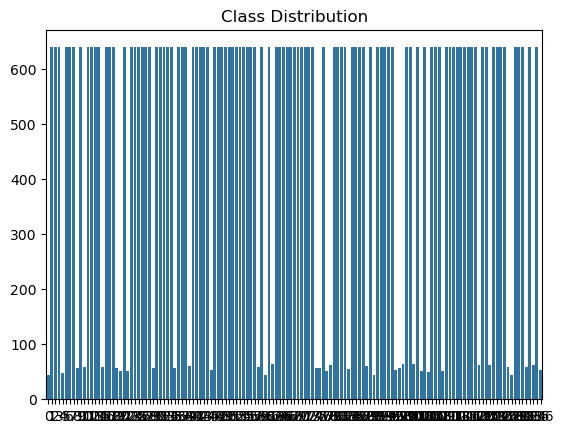

In [18]:
class_distribution = Counter(train_data.classes)
sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()))
plt.title('Class Distribution')
plt.show() 

# Build the CNN Model

In [21]:
model = Sequential()

In [23]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(hgt, wdt, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.05))

model.add(Dense(11, activation='softmax'))

## Compile the Model

In [27]:
model.compile(optimizer=Adam(),loss='categorical_crossentropy',
              metrics=['accuracy'])

## Train the Model

In [30]:
history = model.fit(train_data,
                    epochs=25,
                    validation_data=validation_data,
                    verbose=1)

Epoch 1/25


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 137), output.shape=(None, 11)

In [23]:
test_loss, test_acc = model.evaluate(validation_data)

print(f'Test accuracy: {test_acc}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.9015 - loss: 0.3688
Test accuracy: 0.9113923907279968


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │           1,419 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,511,139 (127.83 MB)

 Trainable params: 11,170,379 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,340,760 (85.22 MB)

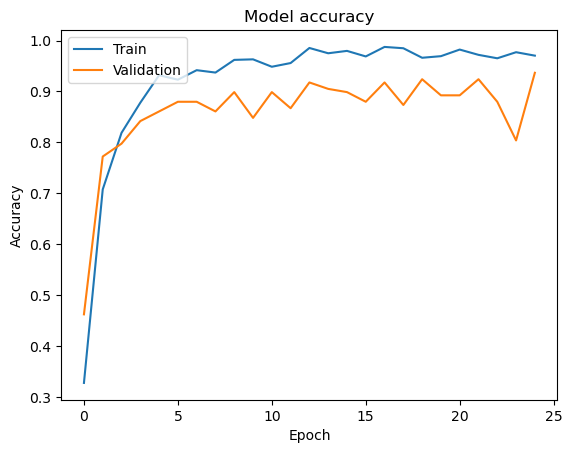

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

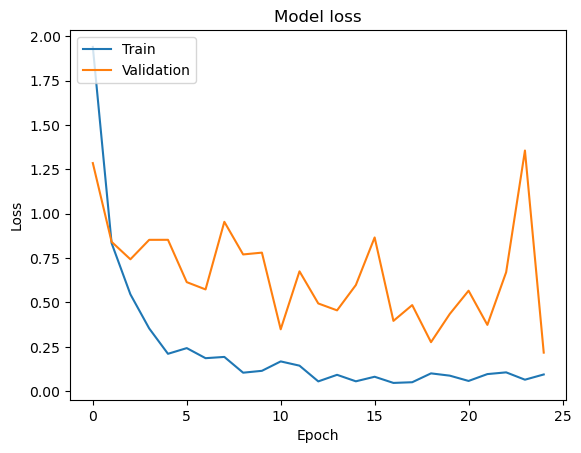

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [27]:
predictions = model.predict(validation_data)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = validation_data.classes

5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step


#### Confusion Matrix

In [28]:
cm = confusion_matrix(true_classes, predicted_classes)

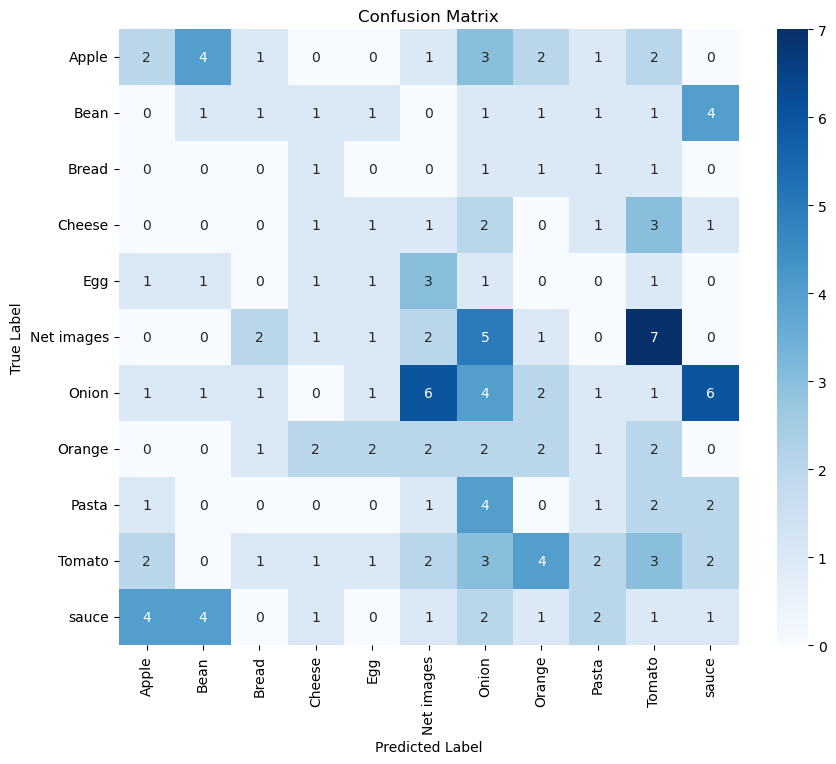

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_data.class_indices, yticklabels=validation_data.class_indices)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [30]:
class_labels = list(validation_data.class_indices.keys())  # Get class labels from data

In [31]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)

In [32]:
print(report)

              precision    recall  f1-score   support

       Apple       0.18      0.12      0.15        16
        Bean       0.09      0.08      0.09        12
       Bread       0.00      0.00      0.00         5
      Cheese       0.11      0.10      0.11        10
         Egg       0.12      0.11      0.12         9
  Net images       0.11      0.11      0.11        19
       Onion       0.14      0.17      0.15        24
      Orange       0.14      0.14      0.14        14
       Pasta       0.09      0.09      0.09        11
      Tomato       0.12      0.14      0.13        21
       sauce       0.06      0.06      0.06        17

    accuracy                           0.11       158
   macro avg       0.11      0.10      0.10       158
weighted avg       0.12      0.11      0.11       158



In [33]:
report_dict = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)

In [34]:
report_df = pd.DataFrame(report_dict).transpose()

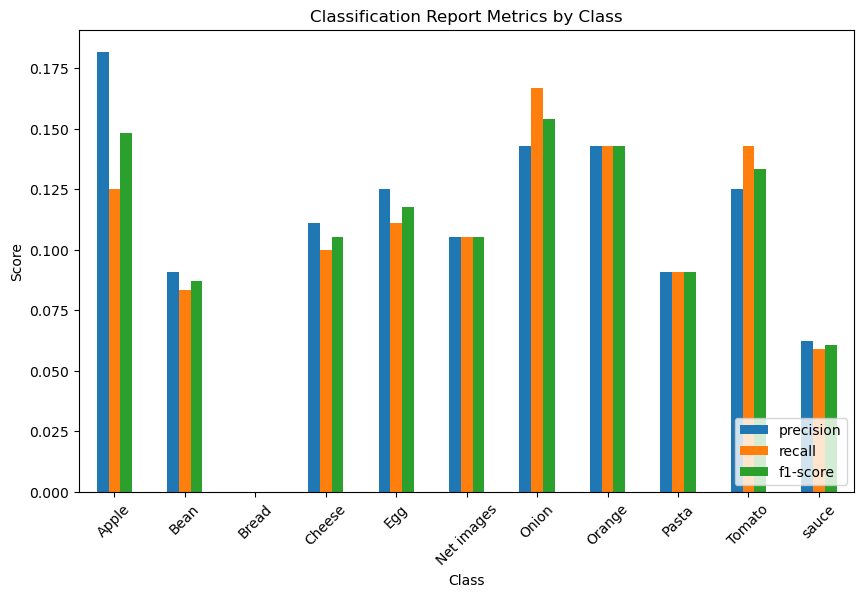

In [35]:
report_df[['precision', 'recall', 'f1-score']].iloc[:-3].plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report Metrics by Class')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()

#### TSNE

In [37]:
model_features = model.predict(validation_data)

5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step


In [38]:
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(model_features)

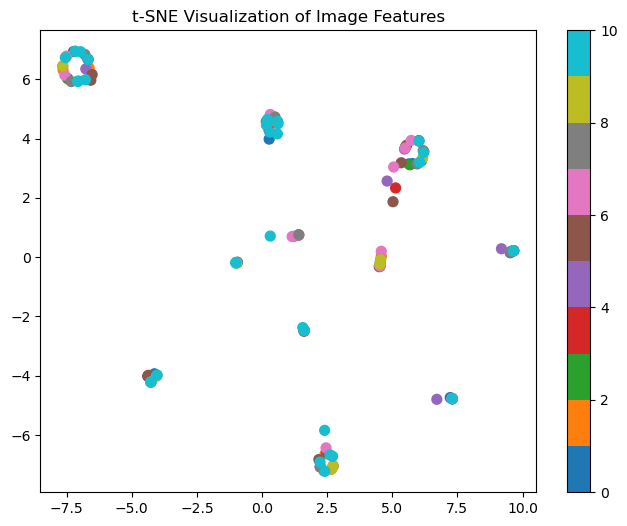

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=true_classes, cmap='tab10', s=50)
plt.title('t-SNE Visualization of Image Features')
plt.colorbar()
plt.show()

### Meta Testing

In [41]:
meta_test_data = validation_data

In [42]:
meta_test_loss, meta_test_acc = model.evaluate(meta_test_data)
print(f'Meta-Test Loss: {meta_test_loss}')
print(f'Meta-Test Accuracy: {meta_test_acc}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.8990 - loss: 0.2857
Meta-Test Loss: 0.2728630006313324
Meta-Test Accuracy: 0.892405092716217


### Cross-Validation

In [47]:
kf = KFold(n_splits=5)
X, Y = next(train_data)
for train_idx, val_idx in kf.split(X):
    X_train, X_val = X[train_idx], X[val_idx]
    Y_train, Y_val = Y[train_idx], Y[val_idx]
    model = Sequential()
    
    # Add convolutional layers followed by pooling layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(hgt, wdt, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the 2D data to 1D
    model.add(Flatten())

    # Add a dense layer followed by a dropout layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.05))

    # Output layer with softmax activation for multi-class classification (assuming 11 classes)
    model.add(Dense(11, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    # Fit the model on the training data
    model.fit(X_train, Y_train, epochs=10, validation_data=(X_val, Y_val))

    # Evaluate on the validation data
    val_loss, val_acc = model.evaluate(X_val, Y_val)
    print(f"Validation Accuracy: {val_acc}")

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1600 - loss: 2.3875 - val_accuracy: 0.0000e+00 - val_loss: 3.0683
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.2800 - loss: 2.8695 - val_accuracy: 0.0000e+00 - val_loss: 1.9832
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - accuracy: 0.4400 - loss: 2.3608 - val_accuracy: 0.0000e+00 - val_loss: 2.2676
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.5200 - loss: 2.0192 - val_accuracy: 0.4286 - val_loss: 2.2412
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - accuracy: 0.8400 - loss: 1.4743 - val_accuracy: 0.0000e+00 - val_loss: 2.4967
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 0.6000 - loss: 1.2947 - val_accuracy: 0.0000e+00 - val_loss: 2.5815
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - accuracy: 0.8800 - loss: 0.7635 - val_accuracy: 0.1429 - val_loss: 2.9051
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 0.9600 - loss: 0.5509 - val_accuracy: 0

In [49]:
import pickle

with open('CNN_model.pkl', 'wb') as file:
    pickle.dump(model, file)